In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset)

In [5]:
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,True,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False
2,28,33.000,3,4449.46200,False,True,True,False
3,33,22.705,0,21984.47061,False,True,True,False
4,32,28.880,0,3866.85520,False,True,True,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False
1334,18,31.920,0,2205.98080,True,False,True,False
1335,18,36.850,0,1629.83350,True,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes'],
      dtype='object')

In [7]:
independent=dataset[['age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_no', 'smoker_yes']]

In [8]:
Dependent=dataset[['charges']]

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent, Dependent, test_size=0.30, random_state=0)

In [76]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse', splitter='random', max_features='log2')
regressor=regressor.fit(x_train,y_train)

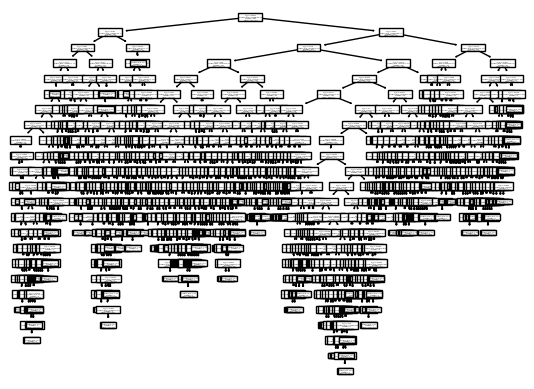

In [77]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [105]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=50, max_features='log2', random_state=0)
regressor.fit(x_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features='log2', n_estimators=50, random_state=0)

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [62]:
from sklearn.svm import SVR
regressor=SVR(kernel="rbf", C=100)
regressor.fit(x_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100)

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [19]:
weight=regressor.coef_
weight

array([[   257.8006705 ,     20.87412859,    -20.87412859,
           321.06004271,    469.58113407, -11709.3335956 ,
         11709.3335956 ]])

In [106]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.8646365503328866

In [107]:
import pickle
filename="finalized.model_Random.sav"
pickle.dump(regressor,open(filename, 'wb'))

In [108]:
loaded_model=pickle.load(open("finalized.model_Random.sav", 'rb'))
result=loaded_model.predict([[25,29,34,40,45,50,55]])
result

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([23749.3607706])